# Exercises

## 1. Which linear regression training algorithm can you use if you have a training set with millions of features?

Batch GD, Stochastic GD, Mini-batch GD are linear regression training algorithms can be used if I have a training set with millions of features.
- Batch GD: This algorithm update model's parameters based on the whole training set. It is possible to save computing times.
- Stochastic GD: Each epoch, this algorithm only use 1 instance of the training data to update model's parameter. 
- Mini-batch GD: This can performance boots from GPUs to compute large matrix.

## 2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

The gradient descent algorithm might suffer from different scales features. It take more time to reach the minimum. We can use Features Scaling skill to make features have the same scale.

## 3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

Gradient descent cannot get stuck in a local minimum when training a logistic regression model. Because Logistic cost function partial derivative looks very much like Linear Regression cost function partial derivative. Both are convex function.

## 4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

Maybe no, the figure below shows that the batch GD is actually reaches the minimum, while both Stochastic GD and Mini-batch GD are walk around. You have to let them run long enough and choose the best learning rate, then all GD algorithms will lead to the same model.

![gradient_descent_figure](images/gradient_descent_paths_plot.png)

## 5.Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

I think the model is overfitting. Perhaps because high learning rate, then the model go over optimal solution and lead to overfitting or number of epochs too large.

I will fix this by decreasing learning rate and the number of epochs.

## 6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?

Stop mini-batch gradient descent immediately when the validation error goes up is can not be a good idea. It is mainly because mini-batch work like stochastic GD. It random then previous solution could not be the minimum. If stop immediately when the validation error goes up maybe you stop too soon. 

## 7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

I think stochastic GD will reach the vicinity of the optimal solution the fastest. Batch GD will actually converge because it use whole training data to compute every epoch. I can make the others converge as well by choosing a good learning schedule.

## 8. Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

If there is a large gap between the training error and the validation error. Maybe the model is overfitting because the model is perform good on training set but worse on validation.

Three ways to solve this:

- Increase model's bias to reduce its variance.
- Choose right degree of Polynomial Features.
- Use Regularized Linear Regression.

## 9. Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter $\alpha$ or reduce it?

That model suffers from high bias because training error and validation error are almost equal and fairly high $\to$ underfitting. I will reduce hyperparameter $\alpha$ to increase variance and reduce bias. 

## 10. Why would you want to use:

**a. Ridge regression instead of plain linear regression (i.e., without any
regularization)?**

**b. Lasso instead of ridge regression?**

**c. Elastic net instead of lasso regression?**

Answer:

**a.** I want to use Ridge regression instead of plain linear regression because it can reduce overfitting situation. Ridge is good for default.

**b.** I want to use Lasso instead of Ridge regression because I suspect that a few of features can be useful. Then lasso will perform greater than Ridge.

**c.** I use Elastic net instead of Lasso Regression because of flexibility of Elastic. I can modify $r$ ratio to use both of Ridge and Lasso, Lasso will behave erratically when the number of features is greater than the number of training instances or several features are strongly correlated.  

## 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

I will implement two logistic regressions. One for outdoor/indoor, another for day/night, because in this case, the problem is multiple output. Then I use two logistic regressions. 

## 12. Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset

In [52]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
iris.target_names, iris.feature_names # 3 class

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [54]:
import numpy as np

In [55]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris["target"].values

X_b = np.c_[np.ones(len(X)), X] # add bias term

test_ratio = 0.2
valid_ratio = 0.2
total_instances = len(X)
test_size = int(total_instances * test_ratio)
valid_size = int(total_instances * valid_ratio)
train_size = total_instances - test_size - valid_size

np.random.seed(42)
index_permutation = np.random.permutation(total_instances)

X_train = X_b[index_permutation[: train_size]]
y_train = y[index_permutation[: train_size]]
X_test = X_b[index_permutation[train_size:-test_size]]
y_test = y[index_permutation[train_size:-test_size]]
X_valid = X_b[index_permutation[-test_size:]]
y_valid = y[index_permutation[-test_size:]]

In [56]:
X_train.shape, y_train.shape ## 4 features, 90 samples

((90, 3), (90,))

### Some equations

**1. Softmax score for class $k$**

$$s_k(\mathbf{x})=\left(\mathbf{\theta}^{(k)}\right)^\intercal\mathbf{x}$$

**2. Softmax function**

$$\widehat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k=\frac{\exp\left(s_k(\mathbf{x})\right)}{\Sigma_{j = 1}^K \exp\left(s_j(\mathbf{x})\right)}$$

**3. Softmax regression classifier prediction**

$$\widehat{y}=\underset{k}{\operatorname*{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_k=\underset{k}{\operatorname*{argmax}} s_k(\mathbf{x})=\underset{k}{\operatorname*{argmax}} \left(\left(\mathbf{\theta}^{(k)}\right)^{\mathsf{T}}\mathbf{x}\right)$$

**4. Coss entropy cost function**

$$J(\boldsymbol{\Theta})=-\frac{1}{m}\Sigma_{i = 1}^m\Sigma_{k = 1}^Ky_k^{(i)}\mathrm{log}\Big(\widehat{p}_k^{(i)}\Big)$$

$$\frac\partial{\partial\theta_j}\mathrm{J}(\mathbf{\theta})=\frac1m\sum_{i = 1}^m\left(\sigma\Big(\mathbf{\theta}^\mathsf{T}\mathbf{x}^{(i)}\Big)-y^{(i)}\Big)x_j^{(i)}\right.$$

In [57]:
## scale data
mean = X_train[:, 1:].mean(axis = 0)
std = X_train[:, 1:].std(axis = 0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:]- mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std

In [58]:
def one_hot(y):
    ones = np.zeros((len(y), y.max() + 1))
    for i in range(len(y)):
        ones[i][y[i]] = 1
    return ones

In [59]:
y_train = one_hot(y_train)
y_valid = one_hot(y_valid)
y_test = one_hot(y_test)

In [60]:
n_features = X_b.shape[1] 
K = len(np.unique(y))
n_features, K

(3, 3)

In [61]:
def softmax_function(logits):
    return np.exp(logits) / np.exp(logits).sum(axis = 1, keepdims = True)

In [72]:
eta = 0.5
n_epochs = 5000
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.rand(n_features, K)

entropys = []
best_Theta = 10e7
best_epoch = 10e7
best_entropy_loss = 10e7

for epoch in range(n_epochs):
    logits = X_train @ Theta
    p_hat_train = softmax_function(logits)
    p_hat_valid = softmax_function(X_valid @ Theta)
    error_train = p_hat_train - y_train
    error_valid = p_hat_valid - y_valid

    entropy_loss = (-y_valid * np.log(p_hat_valid + epsilon)).sum(axis = 1).mean()
    if len(entropys) > 1 and entropy_loss > entropys[-1]:
        if best_entropy_loss and best_entropy_loss > entropys[-1]:
            best_entropy_loss = entropys[-1]
            best_Theta = Theta
            best_epoch = epoch

    
    entropys.append(entropy_loss)
    gradients = 1/m * X_train.T @ error_train
    Theta = Theta - eta * gradients

In [73]:
print(f"Best entropy loss = {best_entropy_loss}, best_epoch = {best_epoch}")

Best entropy loss = 0.07125980803117586, best_epoch = 2150


In [64]:
best_Theta

array([[ 0.51666075,  5.32987885, -3.78929124],
       [-5.11371527,  0.19839672,  5.8259902 ],
       [-4.68005491, -0.24497502,  6.45040469]])

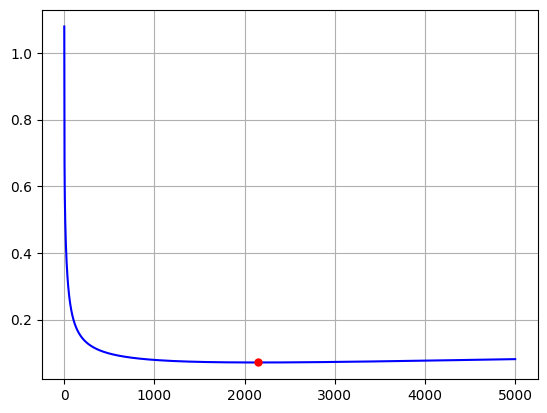

In [80]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1, n_epochs, n_epochs), entropys, "b-")
plt.plot([best_epoch], [best_entropy_loss], "r.", markersize = 10)
plt.grid()
plt.show()

In [65]:
logits = X_valid @ best_Theta
p_hat = softmax_function(logits)
y_predict_valid = p_hat.argmax(axis = 1)

In [66]:
accuracy_valid = (one_hot(y_predict_valid) == y_valid).mean()
accuracy_valid.round(2)

0.98

### Evaluate on test set

In [67]:
logits_test = X_test @ best_Theta
p_hat_test = softmax_function(logits_test)
y_predict_test = p_hat_test.argmax(axis = 1)
accuracy_test = (one_hot(y_predict_test) == y_test).mean()
accuracy_test.round(2)

0.96